In [54]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [55]:
fifa_stats = pd.read_csv('CompleteDataset.csv',low_memory=False)

In [56]:
fifa_stats2 = fifa_stats[['Age','Overall','Potential','Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']]

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,32,94,94,€95.5M,€565K,2228,89,63,89,63,...,96,83,94,23,91,92,31,80,85,88
1,30,93,93,€105M,€565K,2154,92,48,90,95,...,95,88,85,26,87,73,28,59,90,85
2,25,92,94,€123M,€280K,2100,94,56,96,82,...,88,81,80,33,90,78,24,53,80,83
3,30,92,92,€97M,€510K,2291,88,78,86,60,...,93,83,87,38,77,89,45,80,84,88
4,31,92,92,€61M,€230K,1493,58,29,52,35,...,85,55,25,11,61,44,10,83,70,11


In [57]:
#This function will help drop all the unwanted str in wages or any other table that is suppose to be an int and is an object
def change_money(row):
    row = row.strip('€ K M')
    row = float(row)
    return row
    
def column_conv(column):
    return [change_money(cell) for cell in column]

fifa_stats2['Wage'] = column_conv(fifa_stats2['Wage'])
fifa_stats2['Value'] = column_conv(fifa_stats2['Value'])

In [101]:
fifa_stats2 = fifa_stats2.apply(pd.to_numeric, errors='coerce', axis=0)
fifa_stats2.head()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,32,94,94,95.5,565.0,2228,89.0,63.0,89.0,63.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,30,93,93,105.0,565.0,2154,92.0,48.0,90.0,95.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,25,92,94,123.0,280.0,2100,94.0,56.0,96.0,82.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,30,92,92,97.0,510.0,2291,88.0,78.0,86.0,60.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,31,92,92,61.0,230.0,1493,58.0,29.0,52.0,35.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


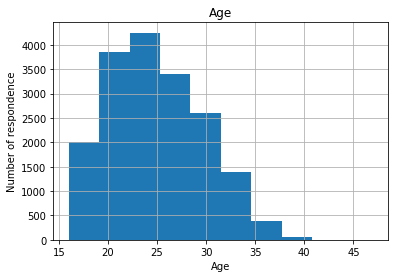

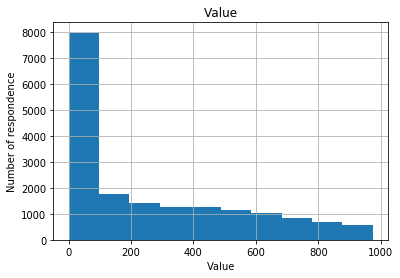

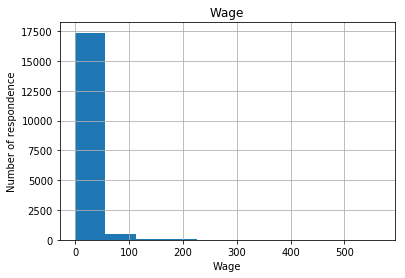

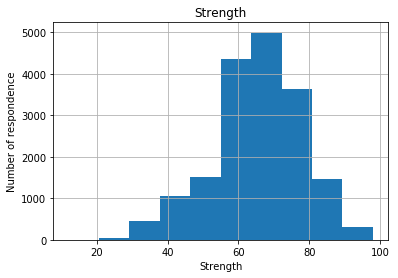

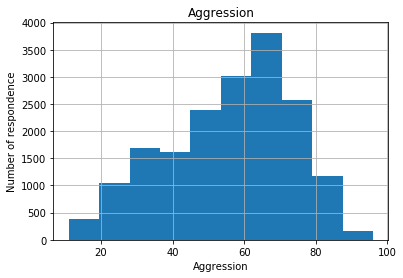

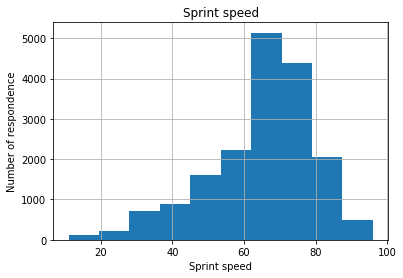

In [113]:
#These functions will help us plot a histogram and a linear reggression graph 

def histogram(column):
    fifa_stats2[column].hist(bins=10)
    plt.title(str(column))
    plt.xlabel(str(column))
    plt.ylabel('Number of respondence')
    plt.show()
    
histogram("Age")
histogram("Value")
histogram("Wage")
histogram("Strength")
histogram("Aggression")
histogram("Sprint speed")

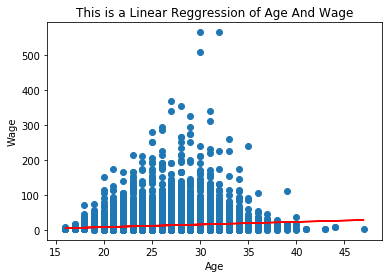

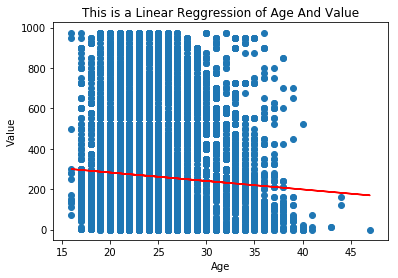

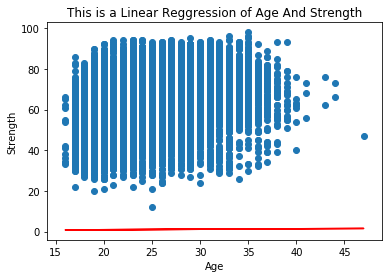

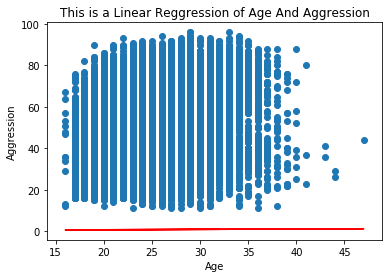

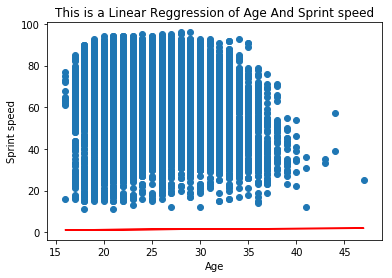

In [117]:

def Linear_reggression(column1,column2):
    x = fifa_stats2[column1]
    y = fifa_stats2[column2]
    # plotting the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x), "red")
    
    # plotting a graph
    plt.scatter(x,y)
    plt.title('This is a Linear Reggression of ' + str(column1) + ' ' + 'And' + ' '+ str(column2))
    plt.xlabel(str(column1))
    plt.ylabel(str(column2))
    plt.show()
    
Linear_reggression('Age', 'Wage')
Linear_reggression('Age', 'Value')
Linear_reggression('Age', 'Strength')
Linear_reggression('Age', 'Aggression')
Linear_reggression('Age','Sprint speed')


In [120]:
series1 = [1, 2, 3, 4, 5]
series2 = [1, 2, 3, 4, 5]

In [121]:
Linear_reggression(series1, series2)

KeyError: '[1 2 3 4 5] not in index'